# Fibre Orientation from Projected Images


## Methods of analysis
Three different methods are proposed for the analysis of fibre orientation from projected images. They are:
1. Intercept method
2. Principal component analysis
3. Hessian method

The implementation of each of this method is discussed in this section.

### 1. Intercept method
The idea here is to use a test line across the projected image. The number of intersections of the test line with the fibres and corresponding intercept lengths can be measured. By changing the orientation of the test line, the variation of mean intercept line is plotted.

In [19]:
%config Completer.use_jedi = False
import os
import numpy as np
import skimage.io as skio
from skimage.draw import line
from matplotlib import pyplot as plt
from coords import coord

data_dir = "C:\\Users\\z5218869\\OneDrive - UNSW\\2RESEARCH\\4_Image Processing\\ProjImageAnalysis\\data\\set1_proj_imgs\\ip_rescaled"

Image dimensions:  (140, 140)


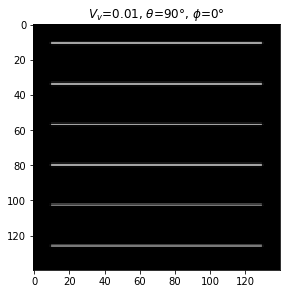

In [16]:
# READ IMAGE: Image with array of fibres in x-direction
in_fname = "fibres_vf0.01_theta90_phi0_rescaled.png"
img = skio.imread(os.path.join(data_dir, in_fname))

# show original image
imax = skio.imshow(img, cmap='gray')
ax = imax.axes
t = ax.set_title(r"$V_v$=0.01, $\theta$=90$\degree$, $\phi$=0$\degree$")
print("Image dimensions: ", img.shape)

line cosines:  coord (1.0, 6.123233995736766e-17)


C:\Users\z5218869\Miniconda3\envs\pyimgc38\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


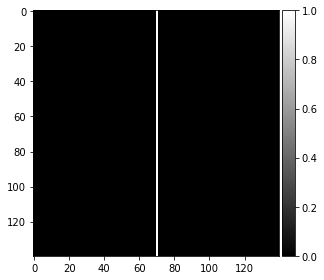

In [30]:
# TEST LINE
# The test line has to be drawn perperndicular, 
# i.e. for phi=0, the test line will be vertical,
# and for phi=90 the test line will be horizontal.


def sanitize_line_ends(line_end, imshp):
    r, c = line_end.value
    if r < 0: r = 0
    if r > imshp[0]:r = imshp[0]-1
    if c < 0: c = 0
    if c > imshp[1]: c = imshp[1]-1
    return coord((int(r), int(c)))

imshp = img.shape
phi = 0  # -90<=phi<=90; positive phi is clockwise rotation in the image.
line_center = coord(np.asarray(imshp) / 2) # coord: custom class to hand cartesian coordinates and operations
line_length = np.linalg.norm(np.asarray(imshp))
line_angle  = phi + 90
line_cosines = coord((np.sin(np.deg2rad(line_angle)), np.cos(np.deg2rad(line_angle))))
print("line cosines: ", line_cosines)
line_tail = sanitize_line_ends(line_center - 0.5*line_length*line_cosines, imshp)
line_head = sanitize_line_ends(line_center + 0.5*line_length*line_cosines, imshp)

rr, cc = line(*line_tail.value, *line_head.value)
line_mask = np.zeros(imshp, dtype=np.uint8)
line_mask[rr, cc] = 1

# show line mask
imax = skio.imshow(line_mask, cmap='gray')